## **#0. Data & Library Importing**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.core.dtypes.common import classes_and_not_datetimelike
from google.colab import drive

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from lightgbm import LGBMClassifier

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
movie = pd.read_csv('/content/drive/MyDrive/movie.csv',encoding='cp949')
movie

,순번,영화명,감독,제작사,개봉일,국적,전국,장르
0,1,명량,김한민,(주)빅스톤픽쳐스,2014-07-30,한국,"17,613,682",사극
1,2,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",2019-01-23,한국,"16,264,944",코미디
2,3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",2017-12-20,한국,"14,410,754",판타지
3,4,국제시장,윤제균,"(주)제이케이필름,(주)씨제이이엔엠",2014-12-17,한국,"14,245,998",드라마
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,2019-04-24,미국,"13,934,592",액션
...,...,...,...,...,...,...,...,...
27232,27233,V2 폭파대작전,엔조 G. 카스텔라리,NaN,1978-12-21,이탈리아,0,액션
27233,27234,W의 비극,김수형,한진흥업주식회사,1985-06-09,한국,0,드라마
27234,27235,X게임,엠마뉴엘 그리센티,NaN,1997-07-05,이탈리아,0,범죄
27235,27236,Y의 체험,이장호,판영화사(주),1987-10-03,한국,0,성인물(에로)


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **# I. 데이터 전처리**

In [ ]:
movie.isna().sum()
clean_movie = movie.dropna()
clean_movie.dtypes

순번      int64
영화명    object
감독     object
제작사    object
개봉일    object
국적     object
전국     object
장르     object
dtype: object

2. Labelling


In [ ]:
clean_movie['전국'] = clean_movie['전국'].str.replace(',','')
clean_movie['전국']

<ipython-input-5-fcb890fdf4b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_movie['전국'] = clean_movie['전국'].str.replace(',','')


0        17613682
1        16264944
2        14410754
3        14245998
6        13624328
           ...   
27226           0
27230           0
27233           0
27235           0
27236           0
Name: 전국, Length: 11334, dtype: object

In [ ]:
clean_movie['전국'] = clean_movie['전국'].astype('int64')
clean_movie.loc[clean_movie['전국'] >= 5000000 ,'전국'] = 1
clean_movie.loc[clean_movie['전국'] < 5000000 ,'전국'] = 0

clean_movie

<ipython-input-6-5412fab12ca9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_movie['전국'] = clean_movie['전국'].astype('int64')


,순번,영화명,감독,제작사,개봉일,국적,전국,장르
0,1,명량,김한민,(주)빅스톤픽쳐스,2014-07-30,한국,5000000,사극
1,2,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",2019-01-23,한국,5000000,코미디
2,3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",2017-12-20,한국,5000000,판타지
3,4,국제시장,윤제균,"(주)제이케이필름,(주)씨제이이엔엠",2014-12-17,한국,5000000,드라마
6,7,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,2009-12-17,미국,5000000,SF
...,...,...,...,...,...,...,...,...
27226,27227,O양의 아파트 2,변장호,연방영화(주),1979-05-12,한국,0,드라마
27230,27231,SOS 대폭발,제임스 힐,워너 브러더스 픽쳐스,1972-02-26,프랑스,0,드라마
27233,27234,W의 비극,김수형,한진흥업주식회사,1985-06-09,한국,0,드라마
27235,27236,Y의 체험,이장호,판영화사(주),1987-10-03,한국,0,성인물(에로)


2. Labelling

In [ ]:
pd.get_dummies(clean_movie,columns = ['전국'])

,순번,영화명,감독,제작사,개봉일,국적,장르,전국_0,전국_5000000
0,1,명량,김한민,(주)빅스톤픽쳐스,2014-07-30,한국,사극,0,1
1,2,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",2019-01-23,한국,코미디,0,1
2,3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",2017-12-20,한국,판타지,0,1
3,4,국제시장,윤제균,"(주)제이케이필름,(주)씨제이이엔엠",2014-12-17,한국,드라마,0,1
6,7,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,2009-12-17,미국,SF,0,1
...,...,...,...,...,...,...,...,...,...
27226,27227,O양의 아파트 2,변장호,연방영화(주),1979-05-12,한국,드라마,1,0
27230,27231,SOS 대폭발,제임스 힐,워너 브러더스 픽쳐스,1972-02-26,프랑스,드라마,1,0
27233,27234,W의 비극,김수형,한진흥업주식회사,1985-06-09,한국,드라마,1,0
27235,27236,Y의 체험,이장호,판영화사(주),1987-10-03,한국,성인물(에로),1,0


3. Nationality
1) Label Encoding


In [ ]:
for col in ['국적']:
    encoder = LabelEncoder()
    clean_movie[col] = encoder.fit_transform(clean_movie[col])
clean_movie.loc[:,['국적']].head

<ipython-input-8-a7ff213081a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_movie[col] = encoder.fit_transform(clean_movie[col])


<bound method NDFrame.head of        국적
0      44
1      44
2      44
3      44
6      15
...    ..
27226  44
27230  42
27233  44
27235  44
27236  44

[11334 rows x 1 columns]>

In [ ]:
pd.get_dummies(clean_movie,columns = ['국적'])

,순번,영화명,감독,제작사,개봉일,전국,장르,국적_0,국적_1,국적_2,...,국적_38,국적_39,국적_40,국적_41,국적_42,국적_43,국적_44,국적_45,국적_46,국적_47
0,1,명량,김한민,(주)빅스톤픽쳐스,2014-07-30,5000000,사극,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",2019-01-23,5000000,코미디,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",2017-12-20,5000000,판타지,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,국제시장,윤제균,"(주)제이케이필름,(주)씨제이이엔엠",2014-12-17,5000000,드라마,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,7,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,2009-12-17,5000000,SF,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27226,27227,O양의 아파트 2,변장호,연방영화(주),1979-05-12,0,드라마,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27230,27231,SOS 대폭발,제임스 힐,워너 브러더스 픽쳐스,1972-02-26,0,드라마,0,0,0,...,0,0,0,0,1,0,0,0,0,0
27233,27234,W의 비극,김수형,한진흥업주식회사,1985-06-09,0,드라마,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27235,27236,Y의 체험,이장호,판영화사(주),1987-10-03,0,성인물(에로),0,0,0,...,0,0,0,0,0,0,1,0,0,0


4. 제작사 레이블링



4. 제작사 레이블링 - csv 파일 따로 생성 후 Bisection






In [ ]:
major_maker = pd.read_csv('/content/drive/MyDrive/major_maker.csv', encoding = 'UTF-8')

#주요 제작사 데이터 프레임 따로 생성

maker_bisection = pd.merge(clean_movie, major_maker, how = 'inner', left_on = "제작사", right_on = '주요 제작사')

In [ ]:
maker_bisection

,순번,영화명,감독,제작사,개봉일,국적,전국,장르,주요 제작사
0,7,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,2009-12-17,15,5000000,SF,이십세기폭스필름코퍼레이션
1,439,엑스맨 : 최후의 전쟁,브렛 래트너,이십세기폭스필름코퍼레이션,2006-06-15,15,0,SF,이십세기폭스필름코퍼레이션
2,631,킹덤 오브 헤븐,리들리 스콧,이십세기폭스필름코퍼레이션,2005-05-04,15,0,액션,이십세기폭스필름코퍼레이션
3,707,엑스맨 탄생: 울버린,개빈 후드,이십세기폭스필름코퍼레이션,2009-04-30,15,0,SF,이십세기폭스필름코퍼레이션
4,763,나니아 연대기: 새벽 출정호의 항해,마이클 앱티드,이십세기폭스필름코퍼레이션,2010-12-08,15,0,판타지,이십세기폭스필름코퍼레이션
...,...,...,...,...,...,...,...,...,...
348,27009,흑룡강,김선경,(주)동아수출공사,1976-10-09,44,0,액션,(주)동아수출공사
349,27047,흙,김기영,(주)동아수출공사,1978-03-25,44,0,드라마,(주)동아수출공사
350,27088,12인의 하숙생,석래명,(주)동아수출공사,1979-01-16,44,0,드라마,(주)동아수출공사
351,20348,기사 윌리엄,브라이언 헬겔랜드,콜롬비아,2001-08-23,15,0,액션,콜롬비아


In [ ]:
clean_movie['주요 제작사'] = clean_movie['순번'].apply(lambda x: 1 if x in maker_bisection['순번'].tolist() else 0)
clean_movie

<ipython-input-12-7ea8582776e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_movie['주요 제작사'] = clean_movie['순번'].apply(lambda x: 1 if x in maker_bisection['순번'].tolist() else 0)


,순번,영화명,감독,제작사,개봉일,국적,전국,장르,주요 제작사
0,1,명량,김한민,(주)빅스톤픽쳐스,2014-07-30,44,5000000,사극,0
1,2,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",2019-01-23,44,5000000,코미디,0
2,3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",2017-12-20,44,5000000,판타지,0
3,4,국제시장,윤제균,"(주)제이케이필름,(주)씨제이이엔엠",2014-12-17,44,5000000,드라마,0
6,7,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,2009-12-17,15,5000000,SF,1
...,...,...,...,...,...,...,...,...,...
27226,27227,O양의 아파트 2,변장호,연방영화(주),1979-05-12,44,0,드라마,0
27230,27231,SOS 대폭발,제임스 힐,워너 브러더스 픽쳐스,1972-02-26,42,0,드라마,1
27233,27234,W의 비극,김수형,한진흥업주식회사,1985-06-09,44,0,드라마,0
27235,27236,Y의 체험,이장호,판영화사(주),1987-10-03,44,0,성인물(에로),0


In [ ]:
pd.get_dummies(clean_movie,columns = ['주요 제작사'])

,순번,영화명,감독,제작사,개봉일,국적,전국,장르,주요 제작사_0,주요 제작사_1
0,1,명량,김한민,(주)빅스톤픽쳐스,2014-07-30,44,5000000,사극,1,0
1,2,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",2019-01-23,44,5000000,코미디,1,0
2,3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",2017-12-20,44,5000000,판타지,1,0
3,4,국제시장,윤제균,"(주)제이케이필름,(주)씨제이이엔엠",2014-12-17,44,5000000,드라마,1,0
6,7,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,2009-12-17,15,5000000,SF,0,1
...,...,...,...,...,...,...,...,...,...,...
27226,27227,O양의 아파트 2,변장호,연방영화(주),1979-05-12,44,0,드라마,1,0
27230,27231,SOS 대폭발,제임스 힐,워너 브러더스 픽쳐스,1972-02-26,42,0,드라마,0,1
27233,27234,W의 비극,김수형,한진흥업주식회사,1985-06-09,44,0,드라마,1,0
27235,27236,Y의 체험,이장호,판영화사(주),1987-10-03,44,0,성인물(에로),1,0


In [ ]:
len(clean_movie,columns = ['주요 제작사_0']==1)

5. Genre

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in ['장르']:
    encoder = LabelEncoder()
    clean_movie[col] = encoder.fit_transform(clean_movie[col])
clean_movie.loc[:,['장르']].head

<ipython-input-14-ec8fd48ed8f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_movie[col] = encoder.fit_transform(clean_movie[col])


<bound method NDFrame.head of        장르
0      11
1      19
2      20
3       6
6       0
...    ..
27226   6
27230   6
27233   6
27235  13
27236   6

[11334 rows x 1 columns]>

 5. 장르별 레이블링 2) 원 핫 인코딩

In [ ]:
pd.get_dummies(clean_movie,columns = ['장르'])

,순번,영화명,감독,제작사,개봉일,국적,전국,주요 제작사,장르_0,장르_1,...,장르_11,장르_12,장르_13,장르_14,장르_15,장르_16,장르_17,장르_18,장르_19,장르_20
0,1,명량,김한민,(주)빅스톤픽쳐스,2014-07-30,44,5000000,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",2019-01-23,44,5000000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",2017-12-20,44,5000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,국제시장,윤제균,"(주)제이케이필름,(주)씨제이이엔엠",2014-12-17,44,5000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,2009-12-17,15,5000000,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27226,27227,O양의 아파트 2,변장호,연방영화(주),1979-05-12,44,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27230,27231,SOS 대폭발,제임스 힐,워너 브러더스 픽쳐스,1972-02-26,42,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
27233,27234,W의 비극,김수형,한진흥업주식회사,1985-06-09,44,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27235,27236,Y의 체험,이장호,판영화사(주),1987-10-03,44,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


6. Editing Release Day

In [ ]:
clean_movie['개봉일'] = clean_movie['개봉일'].str.replace('-','')
clean_movie

<ipython-input-16-41cdafa5c5a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_movie['개봉일'] = clean_movie['개봉일'].str.replace('-','')


,순번,영화명,감독,제작사,개봉일,국적,전국,장르,주요 제작사
0,1,명량,김한민,(주)빅스톤픽쳐스,20140730,44,5000000,11,0
1,2,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",20190123,44,5000000,19,0
2,3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",20171220,44,5000000,20,0
3,4,국제시장,윤제균,"(주)제이케이필름,(주)씨제이이엔엠",20141217,44,5000000,6,0
6,7,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,20091217,15,5000000,0,1
...,...,...,...,...,...,...,...,...,...
27226,27227,O양의 아파트 2,변장호,연방영화(주),19790512,44,0,6,0
27230,27231,SOS 대폭발,제임스 힐,워너 브러더스 픽쳐스,19720226,42,0,6,1
27233,27234,W의 비극,김수형,한진흥업주식회사,19850609,44,0,6,0
27235,27236,Y의 체험,이장호,판영화사(주),19871003,44,0,13,0



1) Sep - Dec / Jan - Feb 

In [ ]:
clean_movie['개봉일'] = clean_movie['개봉일'].str[4:]
clean_movie['개봉일'] = clean_movie['개봉일'].astype('int64')
clean_movie.loc[clean_movie['개봉일'] >= 900,'개봉일'] = 4
clean_movie.loc[clean_movie['개봉일'] < 200 ,'개봉일'] = 1
clean_movie.loc[(clean_movie['개봉일'] >=200) & (clean_movie['개봉일'] <900) ,'개봉일'] = 0


<ipython-input-17-a72d0d1e33d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_movie['개봉일'] = clean_movie['개봉일'].str[4:]
<ipython-input-17-a72d0d1e33d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_movie['개봉일'] = clean_movie['개봉일'].astype('int64')


In [ ]:
pd.get_dummies(clean_movie,columns = ['개봉일'])

,순번,영화명,감독,제작사,국적,전국,장르,주요 제작사,개봉일_0,개봉일_1
0,1,명량,김한민,(주)빅스톤픽쳐스,44,5000000,11,0,1,0
1,2,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",44,5000000,19,0,0,1
2,3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",44,5000000,20,0,0,1
3,4,국제시장,윤제균,"(주)제이케이필름,(주)씨제이이엔엠",44,5000000,6,0,0,1
6,7,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,15,5000000,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
27226,27227,O양의 아파트 2,변장호,연방영화(주),44,0,6,0,1,0
27230,27231,SOS 대폭발,제임스 힐,워너 브러더스 픽쳐스,42,0,6,1,1,0
27233,27234,W의 비극,김수형,한진흥업주식회사,44,0,6,0,1,0
27235,27236,Y의 체험,이장호,판영화사(주),44,0,13,0,0,1


7. Director

In [ ]:
main_gamdok = pd.read_csv('/content/drive/MyDrive/maingamdok.csv',encoding='cp949')
# Create a separate DataFrame for major domestic directors.

gamdok_bisection = pd.merge(clean_movie, main_gamdok, how='inner', left_on='감독', right_on='주요 감독')

In [ ]:
gamdok_bisection

,순번,영화명,감독,제작사,개봉일,국적,전국,장르,주요 제작사,주요 감독
0,1,명량,김한민,(주)빅스톤픽쳐스,0,44,5000000,11,0,김한민
1,53,최종병기 활,김한민,"(주)디씨지플러스,(주)다세포클럽",0,44,5000000,11,0,김한민
2,57,한산: 용의 출현,김한민,(주)빅스톤픽쳐스,0,44,5000000,16,0,김한민
3,395,극락도 살인사건,김한민,(주)두엔터테인먼트,0,44,0,3,0,김한민
4,1151,핸드폰,김한민,"(주)씨네토리,(주)한컴",0,44,0,14,0,김한민
...,...,...,...,...,...,...,...,...,...,...
904,23549,심판자,정창화,(주)화천공사,0,44,0,6,0,정창화
905,25368,죽음의 다섯 손가락,정창화,안양,1,44,0,16,0,정창화
906,26930,황비,정창화,합동영화(주),0,44,0,16,0,정창화
907,27013,흑무사,정창화,(주)화천공사,1,44,0,16,0,정창화


In [ ]:
clean_movie['주요 감독'] = clean_movie['순번'].apply(lambda x: 1 if x in gamdok_bisection['순번'].tolist() else 0)
clean_movie

<ipython-input-21-48fed45a23c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_movie['주요 감독'] = clean_movie['순번'].apply(lambda x: 1 if x in gamdok_bisection['순번'].tolist() else 0)


,순번,영화명,감독,제작사,개봉일,국적,전국,장르,주요 제작사,주요 감독
0,1,명량,김한민,(주)빅스톤픽쳐스,0,44,5000000,11,0,1
1,2,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",1,44,5000000,19,0,1
2,3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",1,44,5000000,20,0,1
3,4,국제시장,윤제균,"(주)제이케이필름,(주)씨제이이엔엠",1,44,5000000,6,0,1
6,7,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,1,15,5000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...
27226,27227,O양의 아파트 2,변장호,연방영화(주),0,44,0,6,0,0
27230,27231,SOS 대폭발,제임스 힐,워너 브러더스 픽쳐스,0,42,0,6,1,0
27233,27234,W의 비극,김수형,한진흥업주식회사,0,44,0,6,0,0
27235,27236,Y의 체험,이장호,판영화사(주),1,44,0,13,0,1


In [ ]:
pd.get_dummies(clean_movie,columns = ['주요 감독'])

,순번,영화명,감독,제작사,개봉일,국적,전국,장르,주요 제작사,주요 감독_0,주요 감독_1
0,1,명량,김한민,(주)빅스톤픽쳐스,0,44,5000000,11,0,0,1
1,2,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",1,44,5000000,19,0,0,1
2,3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",1,44,5000000,20,0,0,1
3,4,국제시장,윤제균,"(주)제이케이필름,(주)씨제이이엔엠",1,44,5000000,6,0,0,1
6,7,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,1,15,5000000,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
27226,27227,O양의 아파트 2,변장호,연방영화(주),0,44,0,6,0,1,0
27230,27231,SOS 대폭발,제임스 힐,워너 브러더스 픽쳐스,0,42,0,6,1,1,0
27233,27234,W의 비극,김수형,한진흥업주식회사,0,44,0,6,0,1,0
27235,27236,Y의 체험,이장호,판영화사(주),1,44,0,13,0,0,1


## **#2. Random Forest**

In [ ]:
data = clean_movie[['주요 감독','주요 제작사','개봉일','국적','장르']].to_numpy()
target = clean_movie['전국'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=27)

In [ ]:
rf = RandomForestClassifier(n_jobs =-1, random_state =42)
scores = cross_validate(rf,train_input, train_target, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.993989192306685 0.9932723421619312


In [ ]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.19088679 0.11260127 0.07242866 0.04171868 0.58236461]


oob_score

In [ ]:
rf = RandomForestClassifier(oob_score = True, n_jobs =-1, random_state =42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.9930517260394839


## **#2. Extra Trees**

In [ ]:
clean_movie.corr()

<ipython-input-31-30e0f97776c0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  clean_movie.corr()


,순번,개봉일,국적,전국,장르,주요 제작사,주요 감독
순번,1.000000,-0.019183,-0.146824,-0.147393,-0.044603,0.024668,-0.070294
개봉일,-0.019183,1.000000,0.041758,0.002690,0.007227,-0.001939,0.007481
국적,-0.146824,0.041758,1.000000,0.016196,-0.097926,-0.199670,0.137041
전국,-0.147393,0.002690,0.016196,1.000000,0.046430,0.059886,0.160717
장르,-0.044603,0.007227,-0.097926,0.046430,1.000000,0.022003,-0.017494
주요 제작사,0.024668,-0.001939,-0.199670,0.059886,0.022003,1.000000,0.016988
주요 감독,-0.070294,0.007481,0.137041,0.160717,-0.017494,0.016988,1.000000


In [ ]:
data = clean_movie[['주요 감독','주요 제작사','개봉일','국적','장르']].to_numpy()
target = clean_movie['전국'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=27)

In [ ]:
et = ExtraTreesClassifier(n_jobs=-1, random_state=27)

scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


0.993989192306685 0.9931620277659026


In [ ]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.19694178 0.08412113 0.03275515 0.03762336 0.64855858]


## **#3.Gradient Boosting**

In [ ]:
gb = GradientBoostingClassifier(random_state=27)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9938237625334845 0.9932724637875054


In [ ]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[8.12003667e-01 1.12123247e-03 1.09740321e-01 3.15139787e-04
 7.68196398e-02]


## #4. **XGBoost**

In [ ]:
xgb = XGBClassifier(tree_method='hist', random_state=42)

train_target[train_target != 0] = 1
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


0.9938237587321614 0.9936032245372299


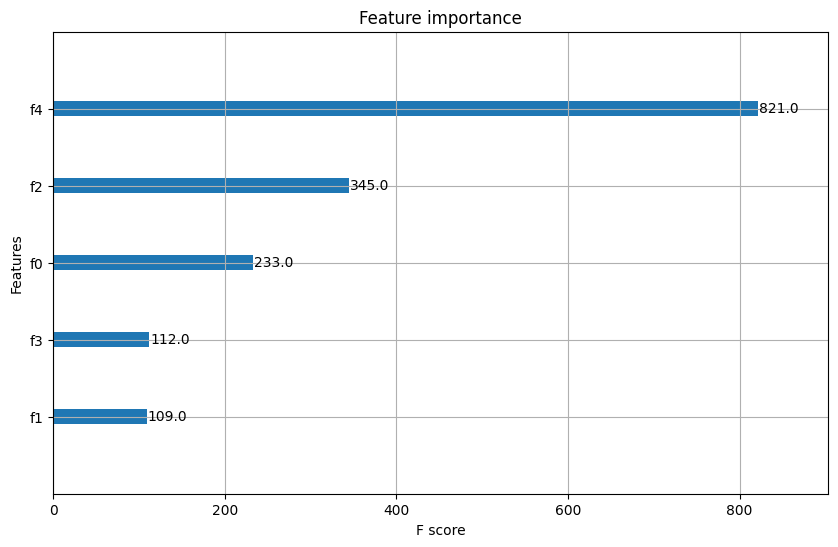

In [ ]:
xgb.fit(train_input, train_target)

fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(xgb, ax=ax)
plt.show()


## **#5. LightGBM**


In [ ]:
lgb = LGBMClassifier()
scores = cross_validate(lgb,train_input, train_target, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.993989192306685 0.9931620885786897
